# Band to band regression
This notebook reads the batch exported geotiff file of paried Sentinel 2 and Landsat 8 images and convert the pixel values to vaex dataframe.
Both Ordinary Least Square (OLS) Regression Model and Reduced Major Axis Regression (RMA) Model.
RMA was calculated using the python package from https://github.com/OceanOptics/pylr2.

Users will need to change the input and output folder. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error #, r2_score
from scipy import stats
import seaborn as sns
import vaex as vx
from pylr2.regress2 import regress2
from geopyfsn import getBand

In [2]:
sns.set_theme(style="darkgrid", font="Arial")
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 20

blue

In [3]:
folderPath = r"/data/shunan/data/harmonize_data/202005_08sentinel/blue"
L8, S2 = getBand(folderPath)
df = pd.DataFrame({'L8': L8, 'S2': S2})
df = vx.from_pandas(df)
del S2,L8

/software/anaconda3/envs/earth/lib/python3.8/site-packages/vaex/functions.py:95: RuntimeWarning: divide by zero encountered in log
  result = function(*numpy_data, **kwargs)


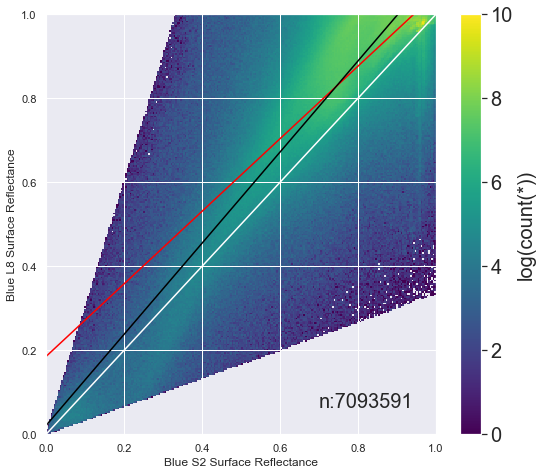

OLS: 
y=0.8639x+0.1855
OLS_r:0.80, p:0.000, n:7093591
RMA: 
y=1.0849x+0.0210
RMA_r:0.80
RMSE is 0.1407


In [4]:

# plot
slope, intercept, r_value, p_value, std_err = stats.linregress(df.S2.values, df.L8.values)
# slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(df.L8.values, df.S2.values)
# slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(S2),np.log(L8))
rma_results = regress2(df.S2.values, df.L8.values, _method_type_2="reduced major axis")

fig, ax = plt.subplots(figsize=(8,7))
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# plot regression model
plt.plot(np.array([0,1]), slope * np.array([0,1]) + intercept, color='red') # ols regression etm+ vs oli
plt.plot([0,1], [0,1], color = 'white') # reference line
# plt.plot(np.array([0,1]), (np.array([0,1]) - intercept1) / slope1 + intercept, color='peru') # ols regression oli vs etm+ 
plt.xlim(0, 1)
plt.ylim(0, 1)

k = rma_results['slope']
b = rma_results['intercept'] 
plt.plot(np.array([0,1]), k * np.array([0,1]) + b, color='black') # rma regression

ax.annotate('n:%.0f' % (len(df.L8.values)), xy=(0.7, 0.1),  xycoords='data',
            horizontalalignment='left', verticalalignment='top',
            )

# scatter plot   vmin=0, vmax=14,
df.viz.heatmap(df.S2, df.L8, what=np.log(vx.stat.count()), show=True, colormap="viridis", vmin=0.0, vmax=10,
    xlabel='Blue S2 Surface Reflectance', ylabel='Blue L8 Surface Reflectance')
ax.set_aspect('equal', 'box')
fig.savefig('print/S2L8/Blue.jpg', dpi=300)


print('OLS: \ny={0:.4f}x+{1:.4f}\nOLS_r:{2:.2f}, p:{3:.3f}, n:{4:.0f}'.format(slope,intercept,r_value,p_value, len(df.L8.values)))
print('RMA: \ny={0:.4f}x+{1:.4f}\nRMA_r:{2:.2f}'.format(k,b, rma_results['r']))
print('RMSE is %.4f' % (mean_squared_error(df.L8.values, df.S2.values, squared=False)))

In [5]:
# sns.residplot(x=df.S2.values, y=df.L8.values)


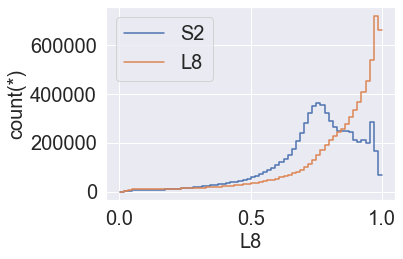

In [6]:
df.viz.histogram(x=df.S2, label='S2')   
df.viz.histogram(x=df.L8, label='L8')   
plt.legend()

green

In [7]:
folderPath = r"/data/shunan/data/harmonize_data/202005_08sentinel/green"
L8, S2 = getBand(folderPath)
df = pd.DataFrame({'L8': L8, 'S2': S2})
df = vx.from_pandas(df)
del S2,L8


/software/anaconda3/envs/earth/lib/python3.8/site-packages/vaex/functions.py:95: RuntimeWarning: divide by zero encountered in log
  result = function(*numpy_data, **kwargs)


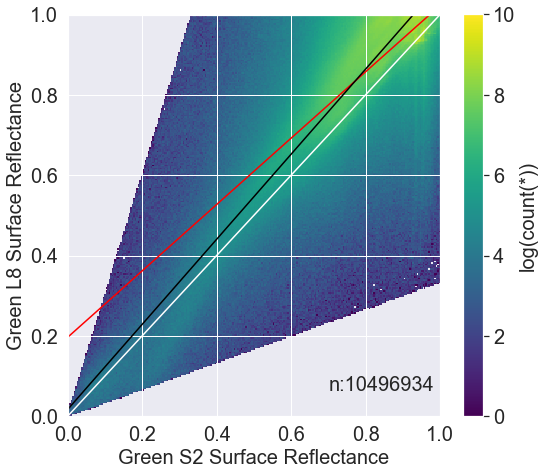

OLS: 
y=0.8262x+0.1965
OLS_r:0.78, p:0.000, n:10496934
RMA: 
y=1.0590x+0.0167
RMA_r:0.78
RMSE is 0.1249


In [8]:
# plot
slope, intercept, r_value, p_value, std_err = stats.linregress(df.S2.values, df.L8.values)
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(df.L8.values, df.S2.values)
rma_results = regress2(df.S2.values, df.L8.values, _method_type_2="reduced major axis")

fig, ax = plt.subplots(figsize=(8,7))
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# plot regression model
plt.plot(np.array([0,1]), slope * np.array([0,1]) + intercept, color='red') # ols regression etm+ vs oli
plt.plot([0,1], [0,1], color = 'white') # reference line
# plt.plot(np.array([0,1]), (np.array([0,1]) - intercept1) / slope1 + intercept, color='peru') # ols regression oli vs etm+ 
plt.xlim(0, 1)
plt.ylim(0, 1)

k = rma_results['slope']
b = rma_results['intercept'] 
plt.plot(np.array([0,1]), k * np.array([0,1]) + b, color='black') # rma regression

ax.annotate('n:%.0f' % (len(df.L8.values)), xy=(0.7, 0.1),  xycoords='data',
            horizontalalignment='left', verticalalignment='top',
            )

# scatter plot
df.viz.heatmap(df.S2, df.L8, what=np.log(vx.stat.count()), show=True, colormap="viridis", vmin=0.0, vmax=10,
    xlabel='Green S2 Surface Reflectance', ylabel='Green L8 Surface Reflectance')
ax.set_aspect('equal', 'box')    
fig.savefig('print/S2L8/Green.jpg', dpi=300)   

print('OLS: \ny={0:.4f}x+{1:.4f}\nOLS_r:{2:.2f}, p:{3:.3f}, n:{4:.0f}'.format(slope,intercept,r_value,p_value, len(df.L8.values)))
print('RMA: \ny={0:.4f}x+{1:.4f}\nRMA_r:{2:.2f}'.format(k,b, rma_results['r']))
print('RMSE is %.4f' % (mean_squared_error(df.L8.values, df.S2.values, squared=False)))

In [9]:
# sns.residplot(x=df.S2.values, y=df.L8.values)

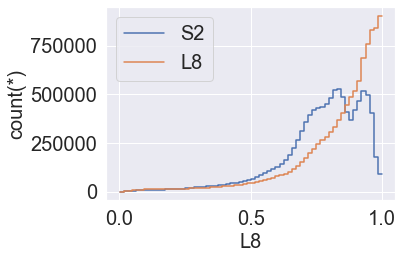

In [10]:
df.viz.histogram(x=df.S2, label='S2')   
df.viz.histogram(x=df.L8, label='L8')   
plt.legend()

red

In [11]:
folderPath = r"/data/shunan/data/harmonize_data/202005_08sentinel/red"
L8, S2 = getBand(folderPath)
df = pd.DataFrame({'L8': L8, 'S2': S2})
df = vx.from_pandas(df)
del S2,L8

/software/anaconda3/envs/earth/lib/python3.8/site-packages/vaex/functions.py:95: RuntimeWarning: divide by zero encountered in log
  result = function(*numpy_data, **kwargs)


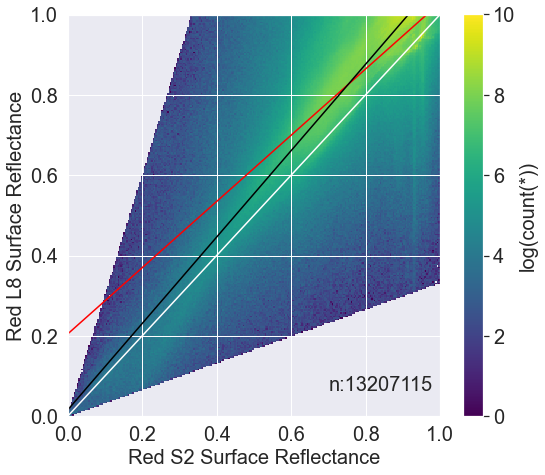

OLS: 
y=0.8246x+0.2047
OLS_r:0.77, p:0.000, n:13207115
RMA: 
y=1.0759x+0.0155
RMA_r:0.77
RMSE is 0.1308


In [12]:
# plot
slope, intercept, r_value, p_value, std_err = stats.linregress(df.S2.values, df.L8.values)
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(df.L8.values, df.S2.values)
rma_results = regress2(df.S2.values, df.L8.values, _method_type_2="reduced major axis")

fig, ax = plt.subplots(figsize=(8,7))
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# plot regression model
plt.plot(np.array([0,1]), slope * np.array([0,1]) + intercept, color='red') # ols regression etm+ vs oli
plt.plot([0,1], [0,1], color = 'white') # reference line
# plt.plot(np.array([0,1]), (np.array([0,1]) - intercept1) / slope1 + intercept, color='peru') # ols regression oli vs etm+ 
plt.xlim(0, 1)
plt.ylim(0, 1)

k = rma_results['slope']
b = rma_results['intercept'] 
plt.plot(np.array([0,1]), k * np.array([0,1]) + b, color='black') # rma regression

ax.annotate('n:%.0f' % (len(df.L8.values)), xy=(0.7, 0.1),  xycoords='data',
            horizontalalignment='left', verticalalignment='top',
            )

# scatter plot
df.viz.heatmap(df.S2, df.L8, what=np.log(vx.stat.count()), show=True, colormap="viridis", vmin=0.0, vmax=10,
    xlabel='Red S2 Surface Reflectance', ylabel='Red L8 Surface Reflectance')
ax.set_aspect('equal', 'box')    
fig.savefig('print/S2L8/Red.jpg', dpi=300) 

print('OLS: \ny={0:.4f}x+{1:.4f}\nOLS_r:{2:.2f}, p:{3:.3f}, n:{4:.0f}'.format(slope,intercept,r_value,p_value, len(df.L8.values)))
print('RMA: \ny={0:.4f}x+{1:.4f}\nRMA_r:{2:.2f}'.format(k,b, rma_results['r']))
print('RMSE is %.4f' % (mean_squared_error(df.L8.values, df.S2.values, squared=False)))

In [13]:
# sns.residplot(x=df.S2.values, y=df.L8.values)

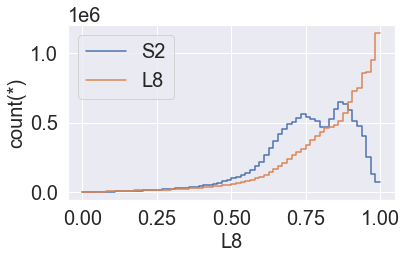

In [14]:
df.viz.histogram(x=df.S2, label='S2')   
df.viz.histogram(x=df.L8, label='L8')   
plt.legend()

nir

In [15]:
folderPath = r"/data/shunan/data/harmonize_data/202005_08sentinel/nir"
L8, S2 = getBand(folderPath)
df = pd.DataFrame({'L8': L8, 'S2': S2})
df = vx.from_pandas(df)
del S2,L8

/software/anaconda3/envs/earth/lib/python3.8/site-packages/vaex/functions.py:95: RuntimeWarning: divide by zero encountered in log
  result = function(*numpy_data, **kwargs)


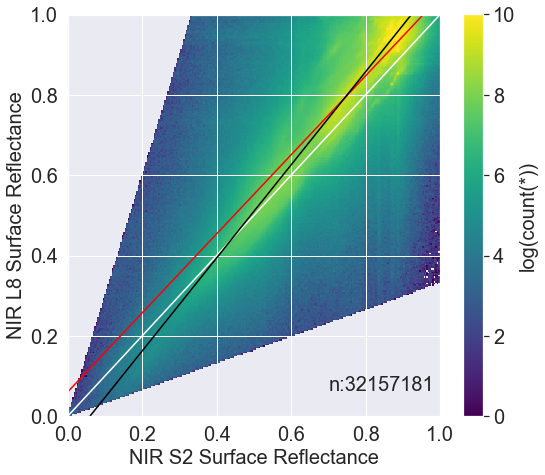

OLS: 
y=0.9838x+0.0604
OLS_r:0.85, p:0.000, n:32157181
RMA: 
y=1.1583x+-0.0693
RMA_r:0.85
RMSE is 0.1048


In [16]:
# plot
slope, intercept, r_value, p_value, std_err = stats.linregress(df.S2.values, df.L8.values)
# slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(df.L8.values, df.S2.values)
rma_results = regress2(df.S2.values, df.L8.values, _method_type_2="reduced major axis")

fig, ax = plt.subplots(figsize=(8,7))
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# plot regression model
plt.plot(np.array([0,1]), slope * np.array([0,1]) + intercept, color='red') # ols regression etm+ vs oli
plt.plot([0,1], [0,1], color = 'white') # reference line
# plt.plot(np.array([0,1]), (np.array([0,1]) - intercept1) / slope1 + intercept, color='peru') # ols regression oli vs etm+ 
plt.xlim(0, 1)
plt.ylim(0, 1)

k = rma_results['slope']
b = rma_results['intercept'] 
plt.plot(np.array([0,1]), k * np.array([0,1]) + b, color='black') # rma regression

ax.annotate('n:%.0f' % (len(df.L8.values)), xy=(0.7, 0.1),  xycoords='data',
            horizontalalignment='left', verticalalignment='top',
            )

# scatter plot
df.viz.heatmap(df.S2, df.L8, what=np.log(vx.stat.count()), show=True, colormap="viridis", vmin=0.0, vmax=10,
    xlabel='NIR S2 Surface Reflectance', ylabel='NIR L8 Surface Reflectance')
ax.set_aspect('equal', 'box')
fig.savefig(r'print/S2L8/Nir.jpg', dpi=300)   

print('OLS: \ny={0:.4f}x+{1:.4f}\nOLS_r:{2:.2f}, p:{3:.3f}, n:{4:.0f}'.format(slope,intercept,r_value,p_value, len(df.L8.values)))
print('RMA: \ny={0:.4f}x+{1:.4f}\nRMA_r:{2:.2f}'.format(k,b, rma_results['r']))
print('RMSE is %.4f' % (mean_squared_error(df.L8.values, df.S2.values, squared=False)))

In [17]:
# sns.residplot(x=df.S2.values, y=df.L8.values)

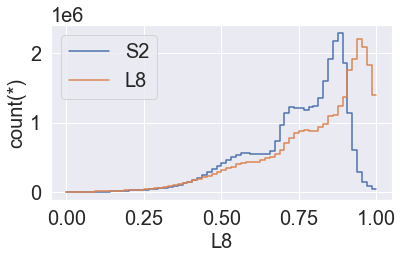

In [18]:
df.viz.histogram(x=df.S2, label='S2')   
df.viz.histogram(x=df.L8, label='L8')   
plt.legend()

swir1

In [19]:
folderPath = r"/data/shunan/data/harmonize_data/202005_08sentinel/swir1"
L8, S2 = getBand(folderPath)
df = pd.DataFrame({'L8': L8, 'S2': S2})
df = vx.from_pandas(df)
del S2,L8

/software/anaconda3/envs/earth/lib/python3.8/site-packages/vaex/functions.py:95: RuntimeWarning: divide by zero encountered in log
  result = function(*numpy_data, **kwargs)


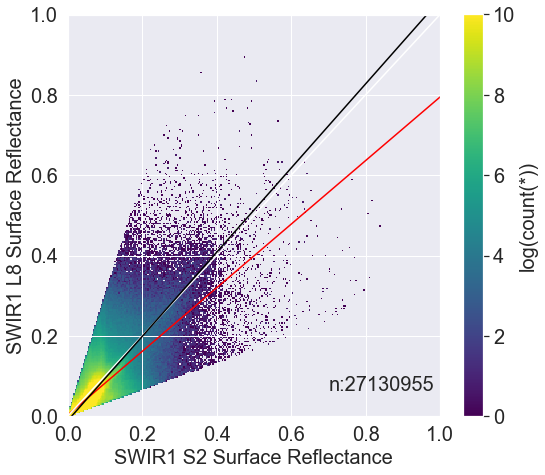

OLS: 
y=0.7917x+0.0030
OLS_r:0.76, p:0.000, n:27130955
RMA: 
y=1.0479x+-0.0112
RMA_r:0.76
RMSE is 0.0230


In [20]:
# plot
slope, intercept, r_value, p_value, std_err = stats.linregress(df.S2.values, df.L8.values)
# slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(df.L8.values, df.S2.values)
rma_results = regress2(df.S2.values, df.L8.values, _method_type_2="reduced major axis")

fig, ax = plt.subplots(figsize=(8,7))
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# plot regression model
plt.plot(np.array([0,1]), slope * np.array([0,1]) + intercept, color='red') # ols regression etm+ vs oli
plt.plot([0,1], [0,1], color = 'white') # reference line
# plt.plot(np.array([0,1]), (np.array([0,1]) - intercept1) / slope1 + intercept, color='peru') # ols regression oli vs etm+ 
plt.xlim(0, 1)
plt.ylim(0, 1)

k = rma_results['slope']
b = rma_results['intercept'] 
plt.plot(np.array([0,1]), k * np.array([0,1]) + b, color='black') # rma regression

ax.annotate('n:%.0f' % (len(df.L8.values)), xy=(0.7, 0.1),  xycoords='data',
            horizontalalignment='left', verticalalignment='top',
            )

# scatter plot
df.viz.heatmap(df.S2, df.L8, what=np.log(vx.stat.count()), show=True, colormap="viridis", vmin=0.0, vmax=10,
    xlabel='SWIR1 S2 Surface Reflectance', ylabel='SWIR1 L8 Surface Reflectance')
ax.set_aspect('equal', 'box')    
fig.savefig('print/S2L8/SWIR1.jpg', dpi=300)  

print('OLS: \ny={0:.4f}x+{1:.4f}\nOLS_r:{2:.2f}, p:{3:.3f}, n:{4:.0f}'.format(slope,intercept,r_value,p_value, len(df.L8.values)))
print('RMA: \ny={0:.4f}x+{1:.4f}\nRMA_r:{2:.2f}'.format(k,b, rma_results['r']))
print('RMSE is %.4f' % (mean_squared_error(df.L8.values, df.S2.values, squared=False)))

In [21]:
# sns.residplot(x=df.S2.values, y=df.L8.values)

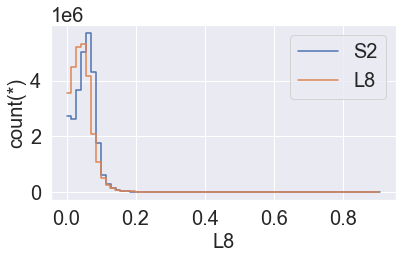

In [22]:
df.viz.histogram(x=df.S2, label='S2')   
df.viz.histogram(x=df.L8, label='L8')   
plt.legend()

swir2

In [23]:
folderPath = r"/data/shunan/data/harmonize_data/202005_08sentinel/swir2"
L8, S2 = getBand(folderPath)
df = pd.DataFrame({'L8': L8, 'S2': S2})
df = vx.from_pandas(df)
del S2,L8

/software/anaconda3/envs/earth/lib/python3.8/site-packages/vaex/functions.py:95: RuntimeWarning: divide by zero encountered in log
  result = function(*numpy_data, **kwargs)


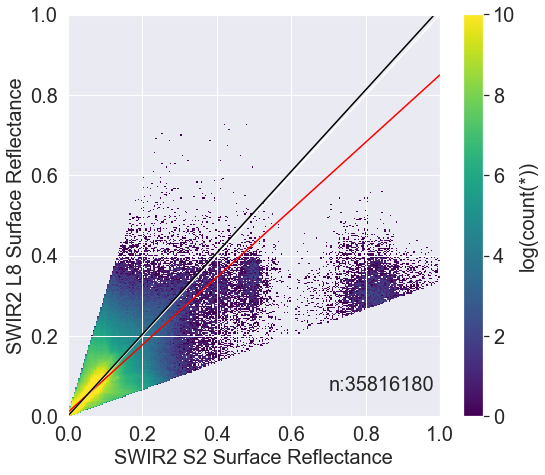

OLS: 
y=0.8410x+0.0091
OLS_r:0.83, p:0.000, n:35816180
RMA: 
y=1.0152x+-0.0000
RMA_r:0.83
RMSE is 0.0206


In [24]:
# plot
slope, intercept, r_value, p_value, std_err = stats.linregress(df.S2.values, df.L8.values)
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(df.L8.values, df.S2.values)
rma_results = regress2(df.S2.values, df.L8.values, _method_type_2="reduced major axis")

fig, ax = plt.subplots(figsize=(8,7))
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# plot regression model
plt.plot(np.array([0,1]), slope * np.array([0,1]) + intercept, color='red') # ols regression etm+ vs oli
plt.plot([0,1], [0,1], color = 'white') # reference line
# plt.plot(np.array([0,1]), (np.array([0,1]) - intercept1) / slope1 + intercept, color='peru') # ols regression oli vs etm+ 
plt.xlim(0, 1)
plt.ylim(0, 1)

k = rma_results['slope']
b = rma_results['intercept'] 
plt.plot(np.array([0,1]), k * np.array([0,1]) + b, color='black') # rma regression

ax.annotate('n:%.0f' % (len(df.L8.values)), xy=(0.7, 0.1),  xycoords='data',
            horizontalalignment='left', verticalalignment='top',
            )

# scatter plot
df.viz.heatmap(df.S2, df.L8, what=np.log(vx.stat.count()), show=True, colormap="viridis", vmin=0.0, vmax=10,
    xlabel='SWIR2 S2 Surface Reflectance', ylabel='SWIR2 L8 Surface Reflectance')
ax.set_aspect('equal', 'box')    
fig.savefig('print/S2L8/SWIR2.jpg', dpi=300)             

print('OLS: \ny={0:.4f}x+{1:.4f}\nOLS_r:{2:.2f}, p:{3:.3f}, n:{4:.0f}'.format(slope,intercept,r_value,p_value, len(df.L8.values)))
print('RMA: \ny={0:.4f}x+{1:.4f}\nRMA_r:{2:.2f}'.format(k,b, rma_results['r']))
print('RMSE is %.4f' % (mean_squared_error(df.L8.values, df.S2.values, squared=False)))

In [25]:
# sns.residplot(x=df.S2.values, y=df.L8.values)

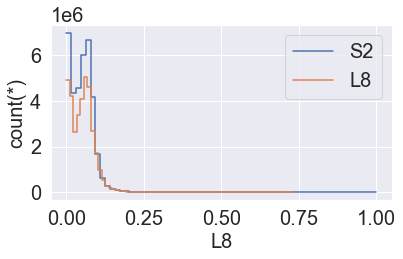

In [26]:
df.viz.histogram(x=df.S2, label='S2')   
df.viz.histogram(x=df.L8, label='L8')   
plt.legend()